# Clasificador y generador de dígitos utilizando el modelo de clasificación Naive Bayes

Por: Brian Felipe Sarmiento Valencia

## Introducción

Los modelos de clasificación son una de las herramientas más utilizadas en el mundo de los datos, específicamente dentro de la minería de datos y ciencias de datos; estos algoritmos o modelos de clasificación son usados como su nombre lo indican para solucionar problemas de clasificación donde el objetivo es determinar si un individuo u elemento pertenece a un grupo o si posee una característica en particular, o por lo menos decir a que grupo, categoría o característica se acerca más.

El objetivo de este proyecto o cuaderno de Jupyter es utilizar uno de los métodos de clasificación estadísticos más comunes, el Naive Bayes y ejemplificar todo el procedimiento para hacer un buen uso de este por medio de la base de datos MINST que contiene un conjunto de 70,000 imágenes en escala de grises, cada una de 28x28 píxeles. Estas imágenes representan dígitos escritos a mano del 0 al 9 y cada imagen tiene una etiqueta asociada que indica qué número representa (0, 1, 2, ..., 9).

Para dar un buen uso del método de clasificación se siguen los siguientes pasos que se realizaran en el transcurso del notebook.

- Adquisición de Datos:
- Limpieza de Datos:
- Exploración de Datos:
- Preparación de Datos:
- Selección del Modelo:
- Entrenamiento del Modelo:
- Evaluación del Modelo:
- Ajuste del Modelo:
- Predicciones:
- Despliegue del Modelo:
- Monitoreo y Mantenimiento:

Los pasos anteriores son los pasos ideales para garantizar una buena implementación de un modelo de clasificación sin embargo para este caso no se trabajará con todos los pasos puesto que el objetivo del trabajo no es hacer un proyecto completo de minería de datos.

Luego de utilizar los pasos al final del cuaderno el lector puede observar que el modelo de clasificación Naive Bayes aplicado a la base de datos MINST genera buenos resultados.

## Adquisición de datos

El primer paso es improtar las librerías necesarias para solucionar el problema de clasificación, para este caso las librerias a utilizar son:

pandas (import pandas as pd): Pandas es una biblioteca de Python ampliamente utilizada para la manipulación y análisis de datos. Proporciona estructuras de datos flexibles, como DataFrames, que facilitan la organización y el procesamiento de datos tabulares.

numpy (import numpy as np): NumPy es otra biblioteca esencial para Python utilizada en el cálculo numérico y científico. Proporciona un conjunto de funciones y arreglos multidimensionales que son fundamentales para muchas operaciones matemáticas y estadísticas en el aprendizaje automático y otras disciplinas.

fetch_openml desde sklearn.datasets: fetch_openml es una función de scikit-learn (sklearn) que se utiliza para descargar conjuntos de datos de la plataforma en línea "OpenML". OpenML es una fuente popular de conjuntos de datos utilizados para la investigación en aprendizaje automático.

matplotlib.pyplot as plt: Matplotlib es una biblioteca de visualización en Python que se utiliza para crear gráficos y visualizaciones de datos.

train_test_split de sklearn.model_selection: train_test_split es una función de scikit-learn que se utiliza para dividir un conjunto de datos en subconjuntos de entrenamiento y prueba.  Esta característica le permite controlar la proporción de datos asignados a cada conjunto y puede incluir estratificación para mantener la distribución de clases.

warnings: los warnings son un módulo de Python que se utiliza para controlar cómo se manejan las advertencias en su código. En este caso, WarnWars.filterwarnings("ignore") se utiliza para suprimir temporalmente todas las advertencias del código. Esto significa que cualquier advertencia que normalmente aparecería al ejecutar el programa se ignorará y no se mostrará en el resultado. Se debe utilizar con cuidado


In [1]:
#importe de librerías
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import random
warnings.filterwarnings("ignore")

Como se menciono en la introducción se utilizará la base de datos MINST que proviene de la librería sklearn; esta base de datos MINST trae la tabla de pixeles o variables de imágenes y un vector que trae las clases o categorías en las que se clasifica estas imágenes, es decir, base de datos MINST trae por separado las variables y el vector de clasificación.

In [2]:
mnist = fetch_openml('mnist_784') #Se guarda la base de datos en la variable mnist

In [3]:
mnist.data #Se muestran los datos.

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se evidencia de la tabla de datos anterior que existen 784 columnas debido a los 28X28 pixeles, donde cada pixel es una varaible y 70 mil imágenes o individuos.

## Limpieza de datos

La limpieza de datos en uno de los procesos más importantes de la minería de datos, debido a que es acá donde se evidencian los primero problemas de los datos y arreglarlos garantiza que los resultados futuros del modelo sean confiables. Para este paso primero se evidencia si los tipos de datos de cada columna son coherentes o son los esperados, se observa si hay datos nulos, vacíos o filas duplicadas y se analiza si los datos están en el rango correspondiente, para este caso como son pixeles se espera que todos los datos sean números enteros y varíen desde 0 hasta 255.

A continuación se observa que cada una de las columnas contiene solo valores enteros

In [4]:
try:
    mnist.data.astype('int').astype(int)
    # Si la conversión es exitosa, todos los valores son números enteros
    es_entero = True
except ValueError:
    # Si ocurre un ValueError, significa que al menos un valor no es un número entero
    es_entero = False

if es_entero:
    print("El dataframe o tabla mnist contiene solo números enteros.")
else:
    print("El dataframe o tabla mnist no contiene solo números enteros.")

El dataframe o tabla mnist contiene solo números enteros.


Se aplica la función df.info() donde se observa que pyhton muestras que las columnas son de tipo float, sin embargo el código anterior muestra que realmente los valores son enteros, no es necesario hacer ningún cambio a tipo entero para cumplir con los objetivos del notebook, el método de clasificación no es afectado por que pyhton interprete los valores de los pixeles como float.

In [5]:
mnist.data.info() #Muestra información de la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


Se evidencia que la base de datos traída desde la librería Sklearn es muy consistente pues no contiene valores nulos, vacíos ni filas duplicadas

In [6]:
print("Cantidad de valores faltantes o nulos es:", mnist.data.isnull().sum().sum())
print("Cantidad de valores faltantes o nulos es:", mnist.data.isna().sum().sum())
print("Cantidad de filas duplicadas es:", mnist.data.duplicated().sum())

Cantidad de valores faltantes o nulos es: 0
Cantidad de valores faltantes o nulos es: 0
Cantidad de filas duplicadas es: 0


Igualmente los valores que contiene el dataframe no son menores de cero ni mayores de 255

In [7]:
print("cantidad de valores menores a cero:", sum(mnist.data.min() < 0))
print("cantidad de valores mayores a 255:", sum(mnist.data.max() > 255))

cantidad de valores menores a cero: 0
cantidad de valores mayores a 255: 0


Por último se evidencia que el rango de datos que toma el data frame son valores entre 0 y 255.

In [8]:
np.sort(mnist.data.stack().unique()) #Valores únicos del todo el dataframe

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Como los datos son consistentes, coherentes y precisos por lo tanto no se necesito de métodos de limpieza de datos y se puede seguir con tranquilidad los demás pasos.

## Exploración de Datos

### Visualización de una imagen que contiene la base de datos

Se observa a continuación una de las imágenes la cual se observa que representa el número 4

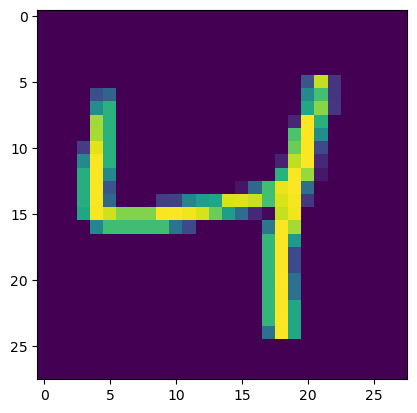

In [9]:
#Muestra la imagen del número 4
plt.imshow(np.reshape(np.array(mnist.data.loc[2]), (28, 28))) #plt.imshow dibuja la imagen pero antes debe utilizar np.reshape para reorganizar la matriz de datos
plt.show()

### Resumen numérico

La siguiente tabla muestra un resumen numérico de los datos, específicamente muestra la cantidad de valores por columnas, la medias, desviación estándar, mínimo, percentil 25%, percentil 50%, percentil 75% y el máximo.

La siguiente tabla muestra la diferentes métricas por cada una de las 784 columnas donde se destaca que la mayoría de las columnas contienen 70 mil valores donde la mayoría son cero, sin embargo es difícil ver cada una de las métricas para todas los pixeles, por tal motivo se propone hacer un promedio de las métricas y hallar valores genéricos para todo el dataframe, esto se puede hacer con tranquilidad debido a que las diferentes 784 variables son todos pixeles y tienen una naturaleza similar.

In [10]:
mnist.data.describe() #Resumen estadístico de los datos

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Así pues, se muestra la tabla del resumen numérico general. De aquí se puede obervar que la media general de los pixeles en 33.38, cercano a 33, una desviación estándar de 49.26, un percentil 25% de 0, un percentil 50% de 12.26, un percentil 75% de 62.57 y un maximo de 220.

In [11]:
pd.DataFrame(mnist.data.describe().mean(axis = 1), columns=["Promedio"]) #Promedio de los resumenes estadísticos.

,Promedio
count,70000.000000
mean,33.385965
std,49.255704
min,0.000000
25%,0.000000
50%,12.267857
75%,62.571429
max,220.459184


### Resumen gráfico

Debido a la gran cantidad de columnas se seleccionan al azar 20 columnas y se hace un análisis gráfico por medio del gráfico histograma y boxplot.

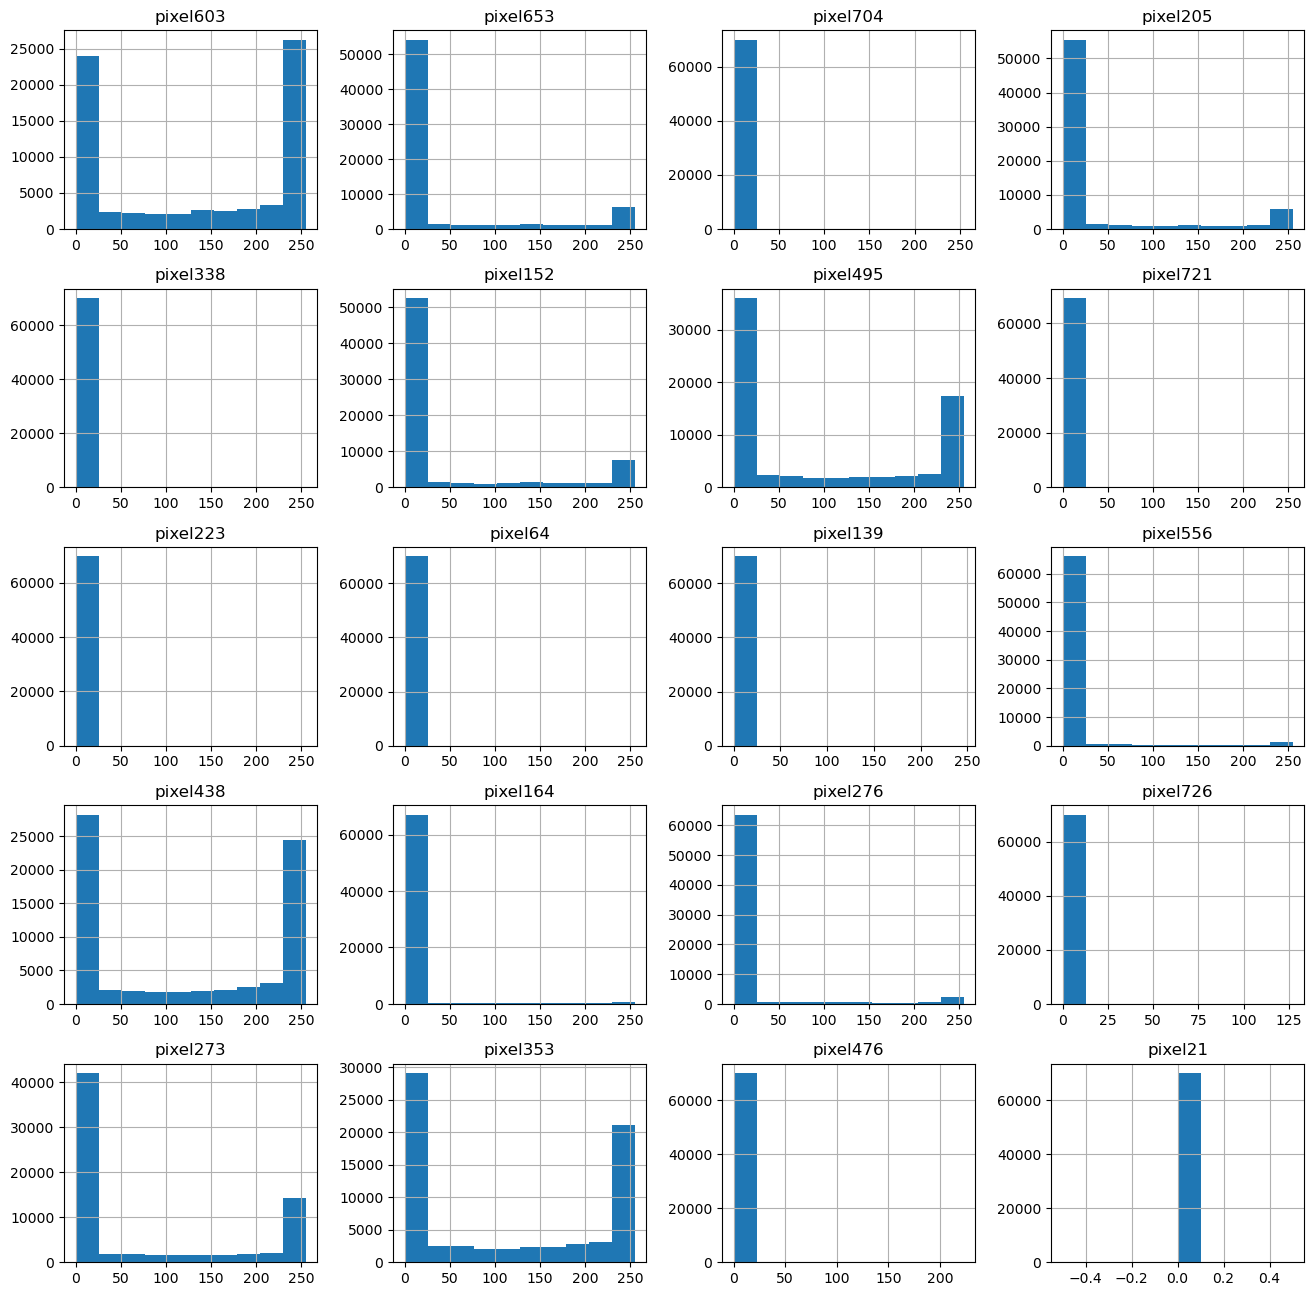

In [12]:
#Histogramas
lista_columnas = random.sample(range(0, 784), 20,)
mnist.data.iloc[:,lista_columnas].hist(figsize=(16,16))
plt.show()

De lo anteriores histogramas se evidencia que la mayoría de las variables de los pixeles toma valores cero y valores muy grandes cercanos a 250, pocas veces se observa pixeles que tomen valores entre 0 y 250. No es fácil adaptarle alguna distribución aparente, en algunos casos parece tener una distribución bimodal.

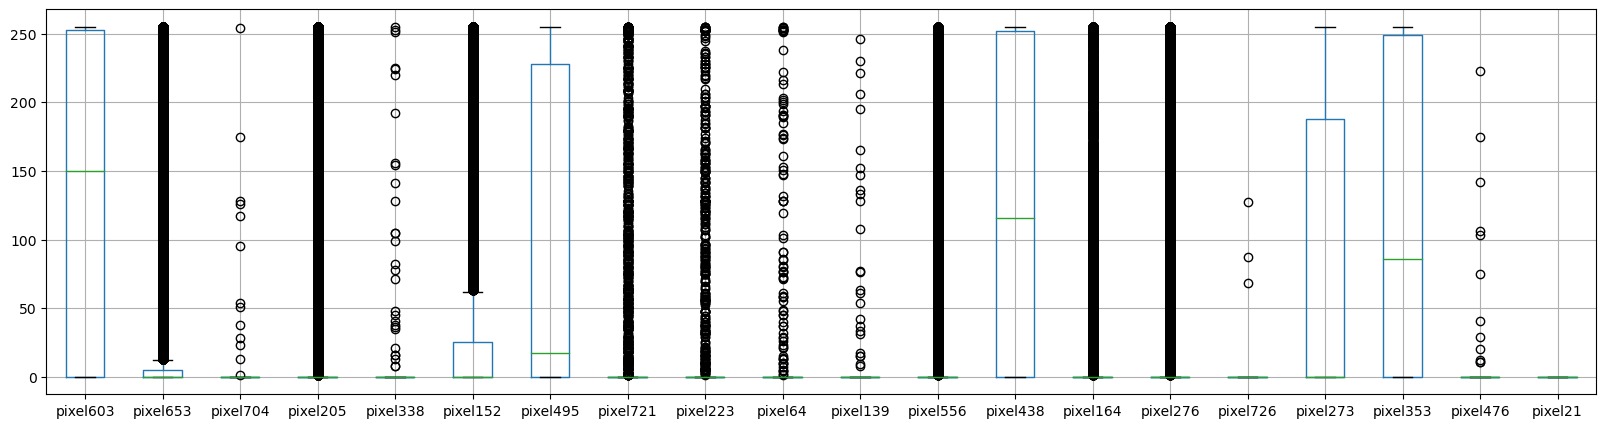

In [13]:
#Box-plot
mnist.data.iloc[:,lista_columnas].boxplot(figsize=(20,5))
plt.show()

Los anteriores gráficos boxpot confirma las conclusiones de los histogramas, la mayoría de las gráficas muestra que los pixeles en su mayoría toma valores en cero lo cual genera que se vean posibles valores atípicos, sin embargo estos realmente no lo son.

### Matriz de correlaciones

Una de los supuestos más importantes del método de clasificación es el hecho de que las variables son independientes, por tal motivo se observará la matriz de correlaciones para verificar esto.

In [14]:
#Cálculo de la matriz de correlaciones
mnist_sin_repetidos = mnist.data[mnist.data.var()[mnist.data.var() != 0].index]
matriz_correlaciones = mnist_sin_repetidos.corr()

In [15]:
matriz_correlaciones

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
pixel13,1.000000,0.814613,0.085874,0.085874,-0.000015,-0.000024,-0.000035,-0.000046,-0.000060,-0.000079,...,-0.000244,-0.000230,-0.000207,-0.000172,-0.000135,-0.000096,-0.000069,-0.000044,-0.000034,-0.000022
pixel14,0.814613,1.000000,0.647816,0.647816,-0.000020,-0.000031,-0.000046,-0.000061,-0.000078,-0.000102,...,-0.000317,-0.000299,-0.000270,-0.000224,-0.000176,-0.000125,-0.000089,-0.000057,-0.000044,-0.000028
pixel15,0.085874,0.647816,1.000000,1.000000,-0.000014,-0.000022,-0.000032,-0.000043,-0.000055,-0.000073,...,-0.000225,-0.000212,-0.000192,-0.000159,-0.000125,-0.000088,-0.000063,-0.000040,-0.000032,-0.000020
pixel16,0.085874,0.647816,1.000000,1.000000,-0.000014,-0.000022,-0.000032,-0.000043,-0.000055,-0.000073,...,-0.000225,-0.000212,-0.000192,-0.000159,-0.000125,-0.000088,-0.000063,-0.000040,-0.000032,-0.000020
pixel33,-0.000015,-0.000020,-0.000014,-0.000014,1.000000,0.770903,-0.000032,-0.000043,-0.000055,-0.000073,...,-0.000225,-0.000212,-0.000192,-0.000159,-0.000125,-0.000088,-0.000063,-0.000040,-0.000032,-0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel776,-0.000096,-0.000125,-0.000088,-0.000088,-0.000088,-0.000135,-0.000200,-0.000266,-0.000343,-0.000449,...,-0.001393,-0.000534,0.019823,0.136315,0.574229,1.000000,0.536725,0.095282,0.010325,-0.000125
pixel777,-0.000069,-0.000089,-0.000063,-0.000063,-0.000063,-0.000097,-0.000143,-0.000190,-0.000245,-0.000322,...,-0.000998,-0.000940,-0.000657,0.019828,0.145781,0.536725,1.000000,0.586818,0.064110,-0.000089
pixel778,-0.000044,-0.000057,-0.000040,-0.000040,-0.000040,-0.000061,-0.000091,-0.000121,-0.000156,-0.000204,...,-0.000634,-0.000597,-0.000540,-0.000154,0.004778,0.095282,0.586818,1.000000,0.442278,0.206548
pixel779,-0.000034,-0.000044,-0.000032,-0.000032,-0.000032,-0.000048,-0.000071,-0.000095,-0.000122,-0.000160,...,-0.000497,-0.000468,-0.000423,-0.000351,-0.000275,0.010325,0.064110,0.442278,1.000000,0.855512


Uno de los métodos usados en la literatura para saber si existe posibles correlaciones entre las variables es calcular el determinante de la matriz de correlaciones, donde un valor cercano a cer indica presencia de correlación y un valores cercano a 1 indica ausencia de correlación.

In [16]:
#Determinante de la matriz
np.linalg.det(matriz_correlaciones.to_numpy())

-0.0

Como el determinante es cercano a cero por lo tanto hay evidencia de que existen variables correlacionadas, lo cual es lógico debido a que en una imagen el valor de un pixel puede depender de los valores de los pixeles vecinos, por lo tanto se aconseja utilizar métodos para eliminar el problema de correlaciones como el Análisis de componentes principales.

### Desbalanceo de datos

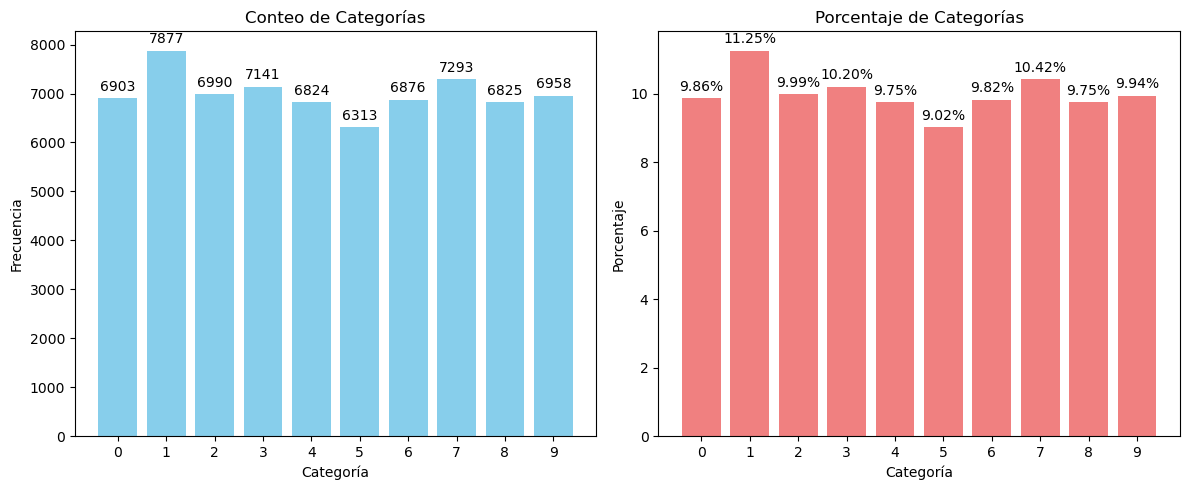

In [17]:
# Crea el gráfico de barras
conteo_categorias = mnist.target.value_counts().sort_index()
porcentajes = (conteo_categorias / len(mnist.target)) * 100

# Ajusta el tamaño de la figura y crea subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 fila y 2 columnas de subplots

# Gráfico de barras de conteo
bars1 = axes[0].bar(conteo_categorias.index, conteo_categorias, color='skyblue')
axes[0].set_title('Conteo de Categorías')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')

# Agrega etiquetas a las barras de conteo
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

# Gráfico de barras de porcentaje
bars2 = axes[1].bar(porcentajes.index, porcentajes, color='lightcoral')
axes[1].set_title('Porcentaje de Categorías')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Porcentaje')

# Agrega etiquetas de porcentaje a las barras de porcentaje
for bar in bars2:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', rotation=0)

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

La anterior gráfica muestra que las etiquetas tienen un porcentaje de presencia similar en la base de datos, sin embargo balancear lo datos siempre es una buena practica.

Se agrupa la tabla de las variables o pixeles con el vector objetivo o que indica las clases de cada imagen.

In [18]:
#Union de las variables con el vector de categorías correspondiente.
df_mnist = pd.concat([mnist.data, mnist.target], axis = 1)
df_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


A continuación se balancean los datos por medio del método subsampling el cual se encarga hacer un muestreo de cada clase con el tamaño o cantidad de datos de la clase o categoría minoritaria que para este caso es el número 5.

In [19]:
from sklearn.utils import resample

# Supongamos que tienes un DataFrame llamado df con una columna 'clase' que es tu variable de respuesta
# Reemplaza 'df' y 'clase' con los nombres reales de tu DataFrame y columna de respuesta

# Calcula el número mínimo de muestras en una categoría
min_muestras = df_mnist['class'].value_counts().min()

# Crea un DataFrame vacío para almacenar las muestras equilibradas
df_mnist_balanceado = pd.DataFrame()

# Realiza el muestreo estratificado para cada categoría
for categoria in df_mnist['class'].unique():
    categoria_df = df_mnist[df_mnist['class'] == categoria]
    muestras_equilibradas = resample(categoria_df, replace=True, n_samples=min_muestras, random_state=42)
    df_mnist_balanceado = pd.concat([df_mnist_balanceado, muestras_equilibradas])

# Ahora df_balanceado contiene un conjunto de datos equilibrado

Se observa a continuación que los datos ya se encuentran balanceados con el tamaño de la clase minoritaria

In [20]:
df_mnist_balanceado['class'].value_counts() #Confirmación de datos balanceados

0    6313
1    6313
2    6313
3    6313
4    6313
5    6313
6    6313
7    6313
8    6313
9    6313
Name: class, dtype: int64

Para seguir trabajando con la tabla de pixeles y el vector de clases por separa se dispone a dividir el dataframe balanceado.

In [21]:
#Separa la base para mayor facilidad
df_mnist_balanceado_data = df_mnist_balanceado.iloc[:,0:-1]
df_mnist_balanceado_target = df_mnist_balanceado.iloc[:,-1]

## Preparación de Datos

Como se vio en lo anteriores pasos los datos ya están preparados para utilizar el modelo

## Selección del Modelo

Como se menciono anteriormente el modelo que se trabajará es el modelo de clasificación de Naive Bayes (Bayes Ingenuo)

## Naive Bayes

El clasificador Naive Bayes es un modelo estadístico que se basa en el teorema de bayes o en la estadística bayesiana, es decir se basa en el hecho de que si existen dos conjunto A y B las probabilidad condicional de A|B se define como:

$$ P(A \mid B) =  \frac{P(A,B)}{P(B)} = \frac{P(B\mid A)P(A)}{P(B,A)+P(B,A^{c})}= \frac{P(B\mid A)P(A)}{P(B\mid A)P(A)+P(B\mid A^{c})P(A^{c})}$$

Este modelo se utiliza para predecir si un individuo u organismo tienen alguna característica o perteneces a cierta categoría por medio de ciertas variables que se miden en estos individuos, por ejemplo:

Existen tiene dos clases a la cual se quiere clasificar los individuos, para este contexto los individuos serán ciudades, estas dos clases, estados o categorías son LLuvia o no lluvia y se tiene un conjunto n de características dentro de una matriz X, para este escenario estas cualidades o variables son categóricas, donde la primera característica se define por nublado o soleado, la segunda podría ser si la humedad es alta o baja, y la tercera característica sería si la temperatura es alta, media o baja.

Así pues,

- X1 = Nublado o soleado
- X2 = Humedad alta o Humedad baja
- X3 = Temperatura alta, media o baja
- Y = Llueve o No llueve

la idea del clasificador Naive Bayes es estimar las siguiente probabilidades para cada individuo/ciudad

- $L = P(LLueve \mid X_{1}, X_{2}, X_{3})$
- $NL = P(No\text{ }LLueve \mid X_{1}, X_{2}, X_{3})$

luego, si L > NL entonces la ciudad se clasifica en el estado de lluvia, por el contrario, se clasifica en el estado de No lluvia.

Para el cálculo de $P(Yi | X_{1}, X_{2}, X_{3}) = \frac{P(X_{1}, X_{2},..., X_{n}, Y_{i})}{P(X_{1}, X_{2}, ..., X_{n})}$

donde se sabe que $P(X_{1}, X_{2},..., X_{n}, Y_{i}) =  P(X_{1} | X_{2},..., X_{n}, Y_{i})P(X_{2} | X_{3},..., X_{n}, Y_{i})...P(X_{n} | Y_{i})P(Y_{i})$

y utilizando el supuesto de que todas las variables $X_{i}$ son independientes podemos simplificar las expresiones anteriores, es por este supuesto que el modelo de clasificación tiene el nombre de ingenuo puesto que este supuesto puede no cumplirse fácilmente en la practica, ya que las variables $X$ pueden estar relacionadas en realidad.

Aplicando el supuesto.

$$P(y_{i} | X_{1}, X_{2},..., X_{n}) = \frac{P(X_{1} | y_{i})P(X_{2} | y_{i})...P(X_{n} | y_{i})P(y_{i})}{P(X_{1}, X_{2}, ..., X_{n})} = \frac{P(X_{1} | y_{i})P(X_{2} | y_{i})...P(X_{n} | y_{i})P(y_{i})}{P(X_{1})P(X_{2})...P(X_{n})}$$

como se puede observar, ahora se tienen todos los elementos para calcular las probabilidades $L$ y $NL$, todo este procedimiento también se puede aplicar para cuando las variables $X$ son continuas trabajando con las funciones de densidad dado los valores de la variables $Y_{i}$.

Para el caso del nuestro escenario, ya podemos calcular por ejemplo la siguiente probabilidad

$P(LLueve \mid X_{1} = Nublado, X_{2} = Humedad\text{ }alta, X_{3} = Temperatura\text{ }alta)$

y las otras probabilidades que nacen de las diferentes combinaciones que pueden ocurrir.

**Para cuando las variables se comportan de forma continua usualmente se utiliza el Bayes ingenuo gaussiano que supone que estas variables tienen distribución normal.**


En la literatura normalmente se mencionan ciertos pros y contras del método de clasificación Naive Bayes

- Predecir segmentos de manera rápida y sencilla.
- El supuesto de independencia es efectivo en modelos con escaso conjunto de entrenamiento.
- Aunque las estimaciones pueden ser poco fiables, a menudo sirven como un punto de partida para comprender los datos.
- En situaciones reales, es poco probable que las características sean completamente independientes.
- Las estimaciones se basan en los datos utilizados para el entrenamiento y están limitadas a ese conjunto de datos.

## Entrenamiento del Modelo

Como se vio anteriormente el modelo a utilizar será el Naive Bayes, Se crean los dataframes X_train, X_test, y_train, y_test, donde X_train es el conjunto de entrenamiento de las características, y_train el conjunto de entrenamiento de las categorías, X_test el conjunto de testeo de las características y y_test es el conjunto de testeo de las categorías.

El conjunto de testeo sera del (100/7)% del conjunto total de la base de datos MINST.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_mnist_balanceado_data, df_mnist_balanceado_target, test_size = 1/7.0, random_state = 1)

Se aplica el método de Análisis de componentes principales para encontrar variables incorrelacionadas.

In [23]:
#Aplicación del método de análisis de componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
train_x = pca.transform(X_train)
test_x = pca.transform(X_test)

Se aplicaran el modelo de clasificación a los conjuntos de datos de entrenamiento originales y a los creado por medio del PCA. A los creados por el método del PCA se aplicara un Gaussian Naive Bayes debido a que los valores que toman las variables se comportan continuamente debido a la transformación, por otro lado se aplicará un modelo Bernoulli Naive Bayes a lo valores originales debido a que estos son enteros.

Gaussian Naive Bayes para los datos transformados por PCA

El modelo creado con los datos transformados se nombrará por model

In [24]:
from sklearn.naive_bayes import GaussianNB
#Estimación del primer modelo
model = GaussianNB()
model.fit(train_x, y_train)

GaussianNB()

Bernoulli Naive Bayes para los datos originales

El modelo creado con los datos originales se nombrará por model2

In [25]:
from sklearn.naive_bayes import BernoulliNB
#Estimación del segundo modelo
model2 = BernoulliNB()
model2.fit(X_train, y_train)

BernoulliNB()

### Evaluación del Modelo

Para evaluar el rendimiento del modelo se utilizan las métricas precisión, recall, f1-score y accuracy.

Gaussian Naive Bayes

In [26]:
from sklearn.metrics import classification_report

#Cálculo de las métricas para el primer modelo
y_pred = model.predict(test_x)

reporte = classification_report(y_test, y_pred, target_names= y_test.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       947
           3       0.98      0.94      0.96       927
           7       0.66      0.87      0.75       883
           1       0.84      0.82      0.83       896
           6       0.88      0.82      0.85       901
           5       0.79      0.80      0.80       911
           8       0.94      0.88      0.91       874
           9       0.89      0.82      0.85       854
           2       0.85      0.83      0.84       912
           4       0.78      0.82      0.80       914

    accuracy                           0.85      9019
   macro avg       0.86      0.85      0.85      9019
weighted avg       0.86      0.85      0.85      9019



Bernoulli Naive Bayes

In [27]:
#Cálculo de las métricas para el segundo modelo
y_pred = model2.predict(X_test)

reporte = classification_report(y_test, y_pred, target_names= y_test.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       947
           3       0.86      0.96      0.91       927
           7       0.86      0.84      0.85       883
           1       0.74      0.78      0.76       896
           6       0.83      0.80      0.81       901
           5       0.80      0.68      0.74       911
           8       0.90      0.90      0.90       874
           9       0.91      0.85      0.88       854
           2       0.77      0.74      0.76       912
           4       0.72      0.83      0.77       914

    accuracy                           0.83      9019
   macro avg       0.83      0.83      0.83      9019
weighted avg       0.83      0.83      0.83      9019



Como se puede evidenciar respecto a las métricas el mejor modelo es el Naive Bayes Gaussiano que utiliza lo datos transformados por el PCA, por lo tanto se escoge este modelo.

## Ajuste del Modelo

El rendimiento del modelo es satisfactorio y para efecto de este trabajo no se realizará ningún ajuste al modelo.

## Predicciones

Se realizarán predicciones por medio de los dos modelos que se estimaron al conjunto de datos de testeo.

Predicciones del modelo con datos transformados por PCA

In [28]:
#Cálculo de las predicciones para el primer modelo
pred_y = model.predict(test_x)
pred_y

array(['0', '3', '9', ..., '1', '7', '6'], dtype='<U1')

Predicciones del modelo con datos originales

In [29]:
#Cálculo de las predicciones para el segundo modelo
pred_y_2 = model2.predict(X_test)
pred_y_2

array(['0', '3', '1', ..., '1', '7', '6'], dtype='<U1')

## Despliegue del Modelo

Debido a que el objetivo del proyecto es hacer una aplicación del método de clasifaición Naive Bayes entonces el despliege no es un paso que se va tener encuenta.

## Monitoreo y Mantenimiento

Igualmente al paso anterior este paso no es necesario para los objetivos del presente notebook.

## Generación de dígitos nuevos

Por medio de la log probabilidades que arroja el modelo se pueden generar números aleatorios 0 y 1 para poder gráficarlos, se espera que las imágenes resultantes se asemejen a los números o categorías que se trabajaron de acuerdo a las probabilidades que se estén utilizando.

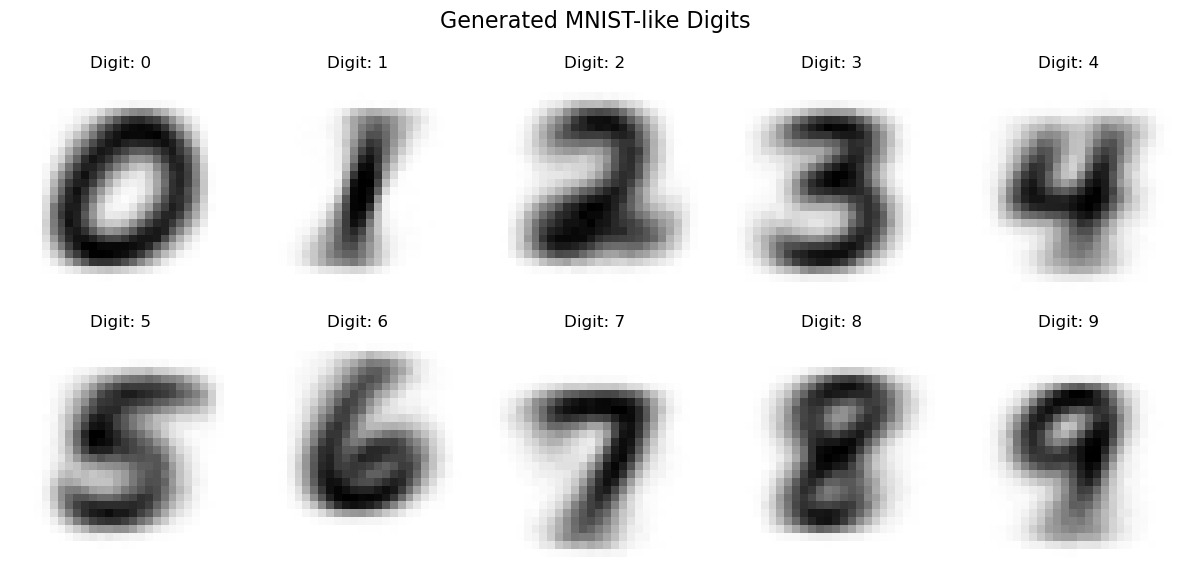

In [78]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
probability = np.exp(model2.feature_log_prob_)
# Enumerar las etiquetas y sus correspondientes probabilidades
labels = list(range(10))

# Generar y mostrar las imágenes

for i, ax in enumerate(axs.flatten()):
    # Generar una imagen binaria usando las probabilidades condicionales

    vec_generated_total = pd.DataFrame()
    for j in range(1000):
        vec_generated = np.random.binomial(1, probability[i])
        vec_generated_total[j] = vec_generated
    vec_generated_total = vec_generated_total.mean(axis = 1)
    
    img = np.array(vec_generated_total).reshape((28, 28))

    # Mostrar la imagen en escala de grises invertida (cmap="gray_r")
    ax.imshow(img, cmap="gray_r")

    # Configurar título y etiquetas de ejes
    ax.set_title(f"Digit: {labels[i]}")
    ax.axis("off")  # Ocultar los ejes

# Título general
plt.suptitle("Generated MNIST-like Digits", fontsize=16)

# Ajustar el espaciado entre subfiguras
plt.tight_layout()

# Mostrar la figura

## Conclusiones

En conclusion, se observo como se realiza un trabajo en jupyter notebook para aplicar un método de clasificación el cual fue bastante sencillo de utilizar y entender, además el modelo fue éxitoso pues cumplio con obtener buenas métricas de rendimiento.